<a href="https://colab.research.google.com/github/Zoe-Garcia/Equipo_2_P2/blob/main/Equipo2_Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equipo 2**
## **Proyecto: Cáncer de mama en México**

#### Integrantes:
- Zoé Ariel García Martínez
- Atenea De La Cruz Brito
- Gerardo Miguel Pérez Solis

### **Pregunta de investigación 1**

#### **¿Cómo ha sido el crecimiento en la incidencia del cáncer de mama en México?**

### **Pregunta de investigación 2**
#### **2. ¿Cuál es la relación entre los gastos de salud y los resultados en su política en la lucha contra el cáncer?**

En esta sección indagaremos cual ha sido el presupuesto para salud por estado de la República Mexicana y lo relacionaremos con los índices de mortalidad por cáncer de mama, con el fin de dilucidar si la dotación de presupuesto para combatir esta enfermedad ha sido adecuada.


In [ ]:
#Librerías
import pandas as pd
import numpy as np

####**Dataset 1:** Gasto en Salud en el Sistema Nacional de Salud, México

- **Observaciones:** Estados de la República
- **Periodo:** 1993-2017
- **Archivo:** "1._GFF_01_2017_A_CONS_O.csv"
- **Fuente:** Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA).

##### **I. Carga de datos**

In [ ]:
### PRIMER DATASET: DGIS (2019). "Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)"
## I.Cargar datos en formato csv
#ADVERTENCIA: Archivo en  latin-1
gasto_salud = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/1._GFF_01_2017_A_CONS_O.csv", sep=',', encoding='latin-1')
gasto_salud.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
gasto_salud.shape

(833, 66)

In [ ]:
#Tipo de datos
gasto_salud.dtypes

Entidad Federativa                                                object
Año                                                              float64
Producto Interno Bruto                       (Miles de pesos)    float64
Gasto Total en Salud\n(I.1 + I.2)                                 object
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)      float64
                                                                  ...   
Unnamed: 61                                                      float64
Unnamed: 62                                                      float64
Unnamed: 63                                                      float64
Unnamed: 64                                                      float64
Unnamed: 65                                                      float64
Length: 66, dtype: object

In [ ]:
#Columnas
gasto_salud.columns

Index(['Entidad Federativa', 'Año',
       'Producto Interno Bruto                       (Miles de pesos)',
       'Gasto Total en Salud\n(I.1 + I.2)',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS',
       'A. Advo. Secretaria de Salud\n(Ramo 12)', 'B. FASSA (Ramo 33)',
       'C. IMSS \nProspera', 'D. SEDENA\n(Ramo 7)', 'E. SEMAR\n(Ramo 13)',
       'F. Gasto \nEstatal', '2. Gasto Total\n(A+B+C+D+E) sin SS', 'A. IMSS',
       'B. ISSSTE', 'C. PEMEX', 'D. ISSFAM', 'E. ISSES',
       'I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C)',
       'A. Gasto de los Hogares e ISFL', 'B. Cuotas de Recuperación',
       'C. Pago de Primas', 'Gasto  público total en salud como % del PIB',
       'Gasto total en salud como % del PIB',
       'Gasto público total en salud como % del gasto total en salud',
       'Gasto público total en salud como % del gasto público total',
       'Gasto público en salud

In [ ]:
#Contar NaN
gasto_salud.isna()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
829,False,False,False,False,False,False,False,False,False,False,Fals

In [ ]:
#Sumar NaN por columna
gasto_salud.isna().sum(axis=0)
#Nota: Columnas "Unnamed" contienen 833 NaN

Entidad Federativa                                                 1
Año                                                                1
Producto Interno Bruto                       (Miles de pesos)      8
Gasto Total en Salud\n(I.1 + I.2)                                  1
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)        1
                                                                ... 
Unnamed: 61                                                      833
Unnamed: 62                                                      833
Unnamed: 63                                                      833
Unnamed: 64                                                      833
Unnamed: 65                                                      833
Length: 66, dtype: int64

In [ ]:
#Sumar NaN por fila
gasto_salud.isna().sum(axis=1)

0      35
1      36
2      36
3      36
4      35
       ..
828    37
829    36
830    35
831    37
832    66
Length: 833, dtype: int64

In [ ]:
#Eliminar columnas con todos los valores NaN
gasto_salud.dropna(axis=1, how='all')
#Nota: Este proceso elimina las columnas sin datos desde 'Unnamed: 31' hasta 'Unnamed: 65'

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Tlaxcala,2017.0,1.154003e+08,n.d.,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,n.d.,n.d.,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,n.d.,NaN,n.d.,n.d.,16684.35,54795.16,5.0,n.d.,n.d.,28.3,5543.41,3858.30,4374.31,94.7,n.d.
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,n.d.,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,n.d.,n.d.,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,n.d.,NaN,n.d.,n.d.,146138.83,730464.20,3.9,n.d.,n.d.,17.5,5828.40,3789.22,4510.97,80.3,n.d.
830,Yucatán,2017.0,3.004113e+08,n.d.,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,n.d.,n.d.,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,n.d.,386159.50,n.d.,n.d.,46437.95,827652.08,4.2,n.d.,n.d.,22.3,6239.37,5505.01,5875.74,75.9,n.d.
831,Zacatecas,2017.0,1.971711e+08,n.d.,7.389037e+06,4601811.37,1283617.56,2199624.15,542541.22,n.d.,n.d.,576028.44,2.787226e+06,2.178816e+06,608409.94,NaN,n.d.,NaN,n.d.,n.d.,44143.17,101928.74,3.7,n.d.,n.d.,25.7,4583.56,4637.43,4616.96,87.5,n.d.


In [ ]:
#Guardar cambios de eliminación de columnas NaN en Data Frame
gasto_salud_drop = gasto_salud.dropna(axis=1, how='all')
gasto_salud_drop

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.768867e+08,1.543384e+08,17271655.41,5276683.27,n.d.,n.d.,268698715.21,259673551.67,n.d.,9025163.54,2.5,5.6,44.9,n.d.,n.d.,n.d.,2394.92,n.d.,2933.4
1,Aguascalientes,1993.0,7.937825e+07,n.d.,1.869821e+06,244488.47,244488.47,n.d.,n.d.,n.d.,n.d.,n.d.,1.625333e+06,1.577068e+06,48264.77,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.4,n.d.,n.d.,n.d.,n.d.,n.d.,2117.59,n.d.,n.d.
2,Baja California,1993.0,2.260210e+08,n.d.,5.909306e+06,524751.50,524751.50,n.d.,n.d.,n.d.,n.d.,n.d.,5.384555e+06,5.251835e+06,132719.40,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,2.6,n.d.,n.d.,n.d.,n.d.,n.d.,2990.13,n.d.,n.d.
3,Baja California Sur,1993.0,4.308558e+07,n.d.,1.674915e+06,312689.42,312689.42,n.d.,n.d.,n.d.,n.d.,n.d.,1.362225e+06,1.267036e+06,95189.44,NaN,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,3.9,n.d.,n.d.,n.d.,n.d.,n.d.,4460.08,n.d.,n.d.
4,Campeche,1993.0,9.559377e+07,n.d.,1.568642e+06,306722.46,306722.46,n.d.,n.d.,n.d.,n.d.,n.d.,1.261920e+06,1.001346e+06,52934.21,207639.73,n.d.,n.d.,n.d.,n.d.,n.d.,n.d.,1.6,n.d.,n.d.,n.d.,n.d.,n.d.,2617.30,n.d.,n.d.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,Tlaxcala,2017.0,1.154003e+08,n.d.,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,n.d.,n.d.,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,n.d.,NaN,n.d.,n.d.,16684.35,54795.16,5.0,n.d.,n.d.,28.3,5543.41,3858.30,4374.31,94.7,n.d.
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,n.d.,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,n.d.,n.d.,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,n.d.,NaN,n.d.,n.d.,146138.83,730464.20,3.9,n.d.,n.d.,17.5,5828.40,3789.22,4510.97,80.3,n.d.
830,Yucatán,2017.0,3.004113e+08,n.d.,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,n.d.,n.d.,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,n.d.,386159.50,n.d.,n.d.,46437.95,827652.08,4.2,n.d.,n.d.,22.3,6239.37,5505.01,5875.74,75.9,n.d.
831,Zacatecas,2017.0,1.971711e+08,n.d.,7.389037e+06,4601811.37,1283617.56,2199624.15,542541.22,n.d.,n.d.,576028.44,2.787226e+06,2.178816e+06,608409.94,NaN,n.d.,NaN,n.d.,n.d.,44143.17,101928.74,3.7,n.d.,n.d.,25.7,4583.56,4637.43,4616.96,87.5,n.d.


In [ ]:
#Sin embargo, aparecen valores "n.d. que son en realidad "NaN"
#Remplazar n.d. por NaN para tener el verdadero conteo de nulos
gasto_salud_drop = gasto_salud_drop.replace('n.d.', np.NaN)
gasto_salud_drop.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN
4,Campeche,1993.0,9.559377e+07,NaN,1.568642e+06,306722.46,306722.46,NaN,NaN,NaN,NaN,NaN,1.261920e+06,1.001346e+06,52934.21,207639.73,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,2617.30,NaN,NaN


In [ ]:
#Repetir el proceso anterior de limpieza de columnas con NaN
gasto_salud_drop = gasto_salud_drop.dropna(axis=1, how='all')
gasto_salud_drop.head(4)

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN


In [ ]:
#Eliminar filas con todos los valores NaN
gasto_salud_drop.dropna(axis=0, how='all')
#Nota: Este proceso elimina la úlitma fila sin información, índice 832

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
0,Estados Unidos Mexicanos,1993.0,8.767898e+09,488075321.91,2.193766e+08,42489885.47,42489885.47,NaN,NaN,NaN,NaN,NaN,1.768867e+08,1.543384e+08,17271655.41,5276683.27,NaN,NaN,268698715.21,259673551.67,NaN,9025163.54,2.5,5.6,44.9,NaN,NaN,NaN,2394.92,NaN,2933.4
1,Aguascalientes,1993.0,7.937825e+07,NaN,1.869821e+06,244488.47,244488.47,NaN,NaN,NaN,NaN,NaN,1.625333e+06,1.577068e+06,48264.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,2117.59,NaN,NaN
2,Baja California,1993.0,2.260210e+08,NaN,5.909306e+06,524751.50,524751.50,NaN,NaN,NaN,NaN,NaN,5.384555e+06,5.251835e+06,132719.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,2990.13,NaN,NaN
3,Baja California Sur,1993.0,4.308558e+07,NaN,1.674915e+06,312689.42,312689.42,NaN,NaN,NaN,NaN,NaN,1.362225e+06,1.267036e+06,95189.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN,NaN,4460.08,NaN,NaN
4,Campeche,1993.0,9.559377e+07,NaN,1.568642e+06,306722.46,306722.46,NaN,NaN,NaN,NaN,NaN,1.261920e+06,1.001346e+06,52934.21,207639.73,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,NaN,NaN,NaN,NaN,2617.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Tamaulipas,2017.0,6.078901e+08,NaN,1.934230e+07,8805405.53,2833516.97,2870723.12,357945.44,NaN,NaN,2743220.00,1.053689e+07,7.589088e+06,1225699.63,1722104.36,NaN,NaN,NaN,NaN,143654.27,1544719.11,3.2,NaN,NaN,18.2,5182.16,5540.42,5339.33,68.8,NaN
828,Tlaxcala,2017.0,1.154003e+08,NaN,5.743768e+06,3514829.33,1726101.32,1593398.56,8231.84,NaN,NaN,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,NaN,NaN,NaN,NaN,16684.35,54795.16,5.0,NaN,NaN,28.3,5543.41,3858.30,4374.31,94.7,NaN
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,NaN,3.682741e+07,19985862.61,8549440.32,6180150.09,1322403.18,NaN,NaN,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,NaN,NaN,NaN,NaN,146138.83,730464.20,3.9,NaN,NaN,17.5,5828.40,3789.22,4510.97,80.3,NaN
830,Yucatán,2017.0,3.004113e+08,NaN,1.276704e+07,5922854.79,2060160.68,1929417.46,505049.00,NaN,NaN,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,NaN,386159.50,NaN,NaN,46437.95,827652.08,4.2,NaN,NaN,22.3,6239.37,5505.01,5875.74,75.9,NaN


In [ ]:
#Guardar cambios de eliminación de fila NaN en Data Frame
gasto_salud_drop = gasto_salud_drop.dropna(axis=0, how='all')
gasto_salud_drop.tail()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),Gasto Total en Salud\n(I.1 + I.2),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),C. IMSS \nProspera,D. SEDENA\n(Ramo 7),E. SEMAR\n(Ramo 13),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,D. ISSFAM,E. ISSES,I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C),A. Gasto de los Hogares e ISFL,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto total en salud como % del PIB,Gasto público total en salud como % del gasto total en salud,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%),Gasto privado en salud per cápita
827,Tamaulipas,2017.0,607890090.0,NaN,19342297.56,8805405.53,2833516.97,2870723.12,357945.44,NaN,NaN,2743220.00,10536892.03,7589088.04,1225699.63,1722104.36,NaN,NaN,NaN,NaN,143654.27,1544719.11,3.2,NaN,NaN,18.2,5182.16,5540.42,5339.33,68.8,NaN
828,Tlaxcala,2017.0,115400274.0,NaN,5743767.63,3514829.33,1726101.32,1593398.56,8231.84,NaN,NaN,187097.61,2228938.30,1577980.71,650957.59,NaN,NaN,NaN,NaN,NaN,16684.35,54795.16,5.0,NaN,NaN,28.3,5543.41,3858.30,4374.31,94.7,NaN
829,Veracruz de Ignacio de la Llave,2017.0,940216541.0,NaN,36827405.28,19985862.61,8549440.32,6180150.09,1322403.18,NaN,NaN,3933869.02,16841542.67,11465035.10,2256865.28,3119642.29,NaN,NaN,NaN,NaN,146138.83,730464.20,3.9,NaN,NaN,17.5,5828.40,3789.22,4510.97,80.3,NaN
830,Yucatán,2017.0,300411279.0,NaN,12767041.69,5922854.79,2060160.68,1929417.46,505049.00,NaN,NaN,1428227.65,6844186.90,5412631.47,1042857.88,2538.05,NaN,386159.50,NaN,NaN,46437.95,827652.08,4.2,NaN,NaN,22.3,6239.37,5505.01,5875.74,75.9,NaN
831,Zacatecas,2017.0,197171148.0,NaN,7389037.38,4601811.37,1283617.56,2199624.15,542541.22,NaN,NaN,576028.44,2787226.01,2178816.07,608409.94,NaN,NaN,NaN,NaN,NaN,44143.17,101928.74,3.7,NaN,NaN,25.7,4583.56,4637.43,4616.96,87.5,NaN


In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                             0
Año                                                                                            0
Producto Interno Bruto                       (Miles de pesos)                                  7
Gasto Total en Salud\n(I.1 + I.2)                                                            807
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                    0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                          0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       22
B. FASSA (Ramo 33)                                                                           172
C. IMSS \nProspera                                                                           524
D. SEDENA\n(Ramo 7)                                                                          817
E. SEMAR\n(Ramo 13)           

In [ ]:
#Aún existen columnas con demasiados NaN. Asimismo, dichas columnas no son tan relevantes
#Se eliminan dichas columnas para poder tener un mejor análisis
gasto_salud_drop = gasto_salud_drop.drop(['Gasto Total en Salud\n(I.1 + I.2)', 'C. IMSS \nProspera', 'D. SEDENA\n(Ramo 7)', 'E. SEMAR\n(Ramo 13)', 'D. ISSFAM', 'E. ISSES', 'I.2 Gasto Privado Total en Salud\n(Miles de pesos constantes)\n(A + B + C)', 'A. Gasto de los Hogares e ISFL', 'Gasto total en salud como % del PIB', 'Gasto público total en salud como % del gasto total en salud', 'Gasto privado en salud per cápita'], axis=1)

In [ ]:
#Contar nuevamente los NaN
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                             0
Año                                                                                            0
Producto Interno Bruto                       (Miles de pesos)                                  7
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                    0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                          0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       22
B. FASSA (Ramo 33)                                                                           172
F. Gasto \nEstatal                                                                           206
2. Gasto Total\n(A+B+C+D+E) sin SS                                                             7
A. IMSS                                                                                        7
B. ISSSTE                     

In [ ]:
#Evaluar nuevamente los NaN por fila
gasto_salud.isna().sum(axis=1)

0      35
1      36
2      36
3      36
4      35
       ..
828    37
829    36
830    35
831    37
832    66
Length: 833, dtype: int64

In [ ]:
#Identificar fila donde inicia año 2000
gasto_salud_drop.iloc[238]

Entidad Federativa                                                                           Estados Unidos Mexicanos
Año                                                                                                              2000
Producto Interno Bruto                       (Miles de pesos)                                             1.09839e+10
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                               2.84323e+08
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                                     9.22211e+07
A. Advo. Secretaria de Salud\n(Ramo 12)                                                                   3.25241e+07
B. FASSA (Ramo 33)                                                                                        45666769.87
F. Gasto \nEstatal                                                                                        14030225.39
2. Gasto Total\n(A+B+C+D+E) sin SS                      

In [ ]:
#Eliminar filas con muchos NaN, correspondientes a los años 1993-1999, para igualar periodo con el Segundo DataFrame sobre mortalidad
gasto_salud_drop = gasto_salud_drop.drop(gasto_salud_drop.index[range(238)])

In [ ]:
gasto_salud_drop

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,C. PEMEX,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000.0,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,8795803.61,NaN,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000.0,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,10902.87,NaN,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000.0,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,34031.87,NaN,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000.0,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,6502.28,NaN,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000.0,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,352551.21,NaN,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,Tamaulipas,2017.0,6.078901e+08,1.934230e+07,8805405.53,2833516.97,2870723.12,2743220.00,1.053689e+07,7.589088e+06,1225699.63,1722104.36,143654.27,1544719.11,3.2,18.2,5182.16,5540.42,5339.33,68.8
828,Tlaxcala,2017.0,1.154003e+08,5.743768e+06,3514829.33,1726101.32,1593398.56,187097.61,2.228938e+06,1.577981e+06,650957.59,NaN,16684.35,54795.16,5.0,28.3,5543.41,3858.30,4374.31,94.7
829,Veracruz de Ignacio de la Llave,2017.0,9.402165e+08,3.682741e+07,19985862.61,8549440.32,6180150.09,3933869.02,1.684154e+07,1.146504e+07,2256865.28,3119642.29,146138.83,730464.20,3.9,17.5,5828.40,3789.22,4510.97,80.3
830,Yucatán,2017.0,3.004113e+08,1.276704e+07,5922854.79,2060160.68,1929417.46,1428227.65,6.844187e+06,5.412631e+06,1042857.88,2538.05,46437.95,827652.08,4.2,22.3,6239.37,5505.01,5875.74,75.9


In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)

Entidad Federativa                                                                            0
Año                                                                                           0
Producto Interno Bruto                       (Miles de pesos)                                 0
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                   0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                         0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                       0
B. FASSA (Ramo 33)                                                                            0
F. Gasto \nEstatal                                                                            1
2. Gasto Total\n(A+B+C+D+E) sin SS                                                            0
A. IMSS                                                                                       0
B. ISSSTE                               

In [ ]:
#Repetir proceso de eliminación de columnas con NaN numerosas
gasto_salud_drop = gasto_salud_drop.drop(['C. PEMEX'], axis=1)
gasto_salud_drop.head(3)

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000.0,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,NaN,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000.0,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,NaN,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000.0,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,NaN,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8


In [ ]:
#Convertir en 0 los NaN de columnas 'F. Gasto \nEstatal' y 'B. Cuotas de Recuperación'
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].fillna(0)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].fillna(0)

In [ ]:
#Evaluar nuevamente los NaN por columna
gasto_salud_drop.isna().sum(axis=0)
#Nota: Obtenemos 0 NaN

Entidad Federativa                                                                           0
Año                                                                                          0
Producto Interno Bruto                       (Miles de pesos)                                0
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                  0
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                        0
A. Advo. Secretaria de Salud\n(Ramo 12)                                                      0
B. FASSA (Ramo 33)                                                                           0
F. Gasto \nEstatal                                                                           0
2. Gasto Total\n(A+B+C+D+E) sin SS                                                           0
A. IMSS                                                                                      0
B. ISSSTE                                         

In [ ]:
# Tipo de datos
gasto_salud_drop.dtypes

Entidad Federativa                                                                            object
Año                                                                                          float64
Producto Interno Bruto                       (Miles de pesos)                                float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                  float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                        float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                      float64
B. FASSA (Ramo 33)                                                                            object
F. Gasto \nEstatal                                                                            object
2. Gasto Total\n(A+B+C+D+E) sin SS                                                           float64
A. IMSS                                                                                    

In [ ]:
#Convertir 'Año' en datetime
gasto_salud_drop['Año'] = gasto_salud_drop['Año'].apply(np.int64)
gasto_salud_drop['Año'] = pd.to_datetime(gasto_salud_drop['Año'].astype(str), format='%Y')
gasto_salud_drop.head()

,Entidad Federativa,Año,Producto Interno Bruto (Miles de pesos),I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2),1. Gasto Total \n(A+B+C+D+E+F) con SS,A. Advo. Secretaria de Salud\n(Ramo 12),B. FASSA (Ramo 33),F. Gasto \nEstatal,2. Gasto Total\n(A+B+C+D+E) sin SS,A. IMSS,B. ISSSTE,B. Cuotas de Recuperación,C. Pago de Primas,Gasto público total en salud como % del PIB,Gasto público total en salud como % del gasto público total,Gasto público en salud per cápita para población con seguridad social,Gasto público en salud per cápita para población sin seguridad social,Gasto público en salud per cápita total,Aportación federal al financiamiento de la salud de la población sin seguridad social (%)
238,Estados Unidos Mexicanos,2000-01-01,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000-01-01,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000-01-01,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000-01-01,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000-01-01,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1


In [ ]:
# Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes

Entidad Federativa                                                                                   object
Año                                                                                          datetime64[ns]
Producto Interno Bruto                       (Miles de pesos)                                       float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                         float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                               float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                             float64
B. FASSA (Ramo 33)                                                                                   object
F. Gasto \nEstatal                                                                                   object
2. Gasto Total\n(A+B+C+D+E) sin SS                                                                  float64
A. IMSS                     

In [ ]:
#Convertir datos object en numéricos
gasto_salud_drop['B. FASSA (Ramo 33)'] = gasto_salud_drop['B. FASSA (Ramo 33)'].apply(np.float64)
gasto_salud_drop['F. Gasto \nEstatal'] = gasto_salud_drop['F. Gasto \nEstatal'].apply(np.float64)
gasto_salud_drop['B. Cuotas de Recuperación'] = gasto_salud_drop['B. Cuotas de Recuperación'].apply(np.float64)
gasto_salud_drop['C. Pago de Primas'] = gasto_salud_drop['C. Pago de Primas'].apply(np.float64)
gasto_salud_drop['Gasto público total en salud como % del gasto público total'] = gasto_salud_drop['Gasto público total en salud como % del gasto público total'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'] = gasto_salud_drop['Gasto público en salud per cápita para población con seguridad social'].apply(np.float64)
gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '] = gasto_salud_drop['Gasto público en salud per cápita para población sin seguridad social '].apply(np.float64)
gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'] = gasto_salud_drop['Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'].apply(np.float64)

In [ ]:
#Nuevamente revisamos el tipo de datos
gasto_salud_drop.dtypes
#Todos los tipos de datos object se modificaron correctamente a float64

Entidad Federativa                                                                                   object
Año                                                                                          datetime64[ns]
Producto Interno Bruto                       (Miles de pesos)                                       float64
I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)                                         float64
1. Gasto Total \n(A+B+C+D+E+F) con SS                                                               float64
A. Advo. Secretaria de Salud\n(Ramo 12)                                                             float64
B. FASSA (Ramo 33)                                                                                  float64
F. Gasto \nEstatal                                                                                  float64
2. Gasto Total\n(A+B+C+D+E) sin SS                                                                  float64
A. IMSS                     

In [ ]:
#Dimensión del DataFrame final
gasto_salud_drop.shape
#594 x 19

(594, 19)

In [ ]:
gasto_salud_drop.columns

Index(['Entidad Federativa', 'Año',
       'Producto Interno Bruto                       (Miles de pesos)',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS',
       'A. Advo. Secretaria de Salud\n(Ramo 12)', 'B. FASSA (Ramo 33)',
       'F. Gasto \nEstatal', '2. Gasto Total\n(A+B+C+D+E) sin SS', 'A. IMSS',
       'B. ISSSTE', 'B. Cuotas de Recuperación', 'C. Pago de Primas',
       'Gasto  público total en salud como % del PIB',
       'Gasto público total en salud como % del gasto público total',
       'Gasto público en salud per cápita para población con seguridad social',
       'Gasto público en salud per cápita para población sin seguridad social ',
       'Gasto público en salud per cápita total',
       'Aportación federal al financiamiento de la salud de la población sin seguridad social (%)'],
      dtype='object')

In [ ]:
#Renombrar columnas: primer paso, crear mapa
column_name_mapping = {
       'Entidad Federativa' : 'Estado', 
       'Año' : 'Año',
       'Producto Interno Bruto                       (Miles de pesos)' : 'PIB en miles de pesos',
       'I.1 Gasto Público Total en Salud\n(Miles de pesos)\n(1 + 2)' : 'Total gasto público en salud',
       '1. Gasto Total \n(A+B+C+D+E+F) con SS' : 'Subtotal no asegurados',
       'A. Advo. Secretaria de Salud\n(Ramo 12)' : 'Gasto administrativo SSA', 
       'B. FASSA (Ramo 33)' : 'Aportaciones federales',
       'F. Gasto \nEstatal' : 'Gasto estatal en salud', 
       '2. Gasto Total\n(A+B+C+D+E) sin SS' : 'Subtotal asegurados', 
       'A. IMSS' : 'IMSS',
       'B. ISSSTE' : 'ISSSTE', 
       'B. Cuotas de Recuperación' : 'Cuotas de recuperación', 
       'C. Pago de Primas' : 'Primas de seguros médicos',
       'Gasto  público total en salud como % del PIB' : 'Total gasto en salud % PIB',
       'Gasto público total en salud como % del gasto público total' : 'Total gasto en salud % gasto público',
       'Gasto público en salud per cápita para población con seguridad social' : 'Gasto en salud asegurados per cápita',
       'Gasto público en salud per cápita para población sin seguridad social ' : 'Gasto en salud no asegurados per cápita',
       'Gasto público en salud per cápita total' : 'Total gasto en salud per cápita',
       'Aportación federal al financiamiento de la salud de la población sin seguridad social (%)' : 'Aportación federal % no asegurados'
}

In [ ]:
#Renombrar columnas: segundo paso, rename
gasto_salud_rename = gasto_salud_drop.rename(columns=column_name_mapping)
gasto_salud_rename.head()

,Estado,Año,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
238,Estados Unidos Mexicanos,2000-01-01,1.098389e+10,2.843230e+08,92221099.75,32524104.49,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0.0,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
239,Aguascalientes,2000-01-01,1.233635e+08,3.028818e+06,1059039.52,6816.29,691829.84,360393.39,1.969779e+06,1.791865e+06,167010.80,0.0,49754.01,2.5,12.8,3052.95,2915.51,3003.45,66.0
240,Baja California,2000-01-01,3.617749e+08,7.325541e+06,1142409.28,58962.54,1035444.66,48002.07,6.183132e+06,5.730923e+06,418176.84,0.0,225017.87,2.0,17.6,3720.76,1286.42,2872.94,95.8
241,Baja California Sur,2000-01-01,5.392448e+07,2.110065e+06,548082.52,6526.28,519422.41,22133.83,1.561983e+06,1.237632e+06,317848.31,0.0,5631.66,3.9,17.3,4842.07,3809.58,4523.62,96.0
242,Campeche,2000-01-01,1.191197e+08,2.428181e+06,984654.51,149975.07,697430.08,137249.36,1.443527e+06,9.289885e+05,161987.19,0.0,1734.41,2.0,7.0,4392.01,2646.65,3465.33,86.1


In [ ]:
#Cambiar índice a Multi-índice jerárquico tipo: Lugar, Año
gasto_salud_rename = gasto_salud_rename.set_index(['Estado', 'Año'])

In [ ]:
#Revisar multi-índice, por ejemplo las filas correspondientes al total nacional con el índice 'Estados Unidos Mexicanos'
gasto_salud_rename.loc[('Estados Unidos Mexicanos' , )]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


,PIB en miles de pesos,Total gasto público en salud,Subtotal no asegurados,Gasto administrativo SSA,Aportaciones federales,Gasto estatal en salud,Subtotal asegurados,IMSS,ISSSTE,Cuotas de recuperación,Primas de seguros médicos,Total gasto en salud % PIB,Total gasto en salud % gasto público,Gasto en salud asegurados per cápita,Gasto en salud no asegurados per cápita,Total gasto en salud per cápita,Aportación federal % no asegurados
Año,,,,,,,,,,,,,,,,,
2000-01-01,1.098389e+10,2.843230e+08,9.222110e+07,3.252410e+07,45666769.87,14030225.39,1.921019e+08,1.581991e+08,25106991.01,0.00,15242292.93,2.6,16.6,3884.49,1792.72,2817.98,84.8
2001-01-01,1.113015e+10,2.973201e+08,9.845457e+07,3.470172e+07,49370886.99,14381964.08,1.988655e+08,1.614671e+08,27498538.85,4535439.68,18370934.32,2.7,16.6,4046.21,1858.57,2911.41,85.4
2002-01-01,1.135181e+10,3.065797e+08,1.039565e+08,3.648042e+07,49616910.18,17859211.05,2.026231e+08,1.649721e+08,27371161.63,5294857.29,20225299.61,2.7,15.7,4145.60,1906.02,2964.47,82.8
2003-01-01,1.371616e+10,3.413223e+08,1.148265e+08,3.823256e+07,55152442.53,17840391.73,2.264958e+08,1.822556e+08,31137314.77,6042391.22,22548726.44,2.5,15.8,4659.20,2046.55,3259.38,84.5
2004-01-01,1.462950e+10,3.874460e+08,1.283782e+08,3.926340e+07,57188030.78,20453576.63,2.590678e+08,2.148326e+08,31385215.25,6001726.66,24818323.23,2.6,17.6,5361.76,2227.48,3656.82,84.1
2005-01-01,1.533560e+10,3.965647e+08,1.525284e+08,5.405342e+07,62001919.83,24164585.07,2.440363e+08,1.961833e+08,34047737.81,6398953.09,28406546.92,2.6,16.7,5081.94,2579.51,3700.99,84.2
2006-01-01,1.638521e+10,4.159350e+08,1.677360e+08,6.403650e+07,64350496.44,26009530.14,2.481990e+08,1.983873e+08,35369161.31,6902849.59,31588338.69,2.5,16.1,5102.53,2806.52,3836.73,84.5
2007-01-01,1.708843e+10,4.480869e+08,1.873456e+08,7.894143e+07,64616657.66,28720208.49,2.607413e+08,2.010516e+08,44433202.72,8268915.24,36307108.86,2.6,15.8,5289.09,3097.16,4081.41,84.7
2008-01-01,1.722585e+10,4.727421e+08,2.143168e+08,9.724832e+07,67599729.43,34462002.07,2.584253e+08,1.977370e+08,44627324.68,6379616.30,37398217.51,2.7,15.2,5139.98,3512.15,4247.50,83.9


##### **III. Procesamiento y exploración de datos**

In [ ]:
## III. Análisis exploratorio de datos
import statistics
gasto_salud_rename.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 594 entries, ('Estados Unidos Mexicanos', Timestamp('2000-01-01 00:00:00')) to ('Zacatecas', Timestamp('2017-01-01 00:00:00'))
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   PIB en miles de pesos                    594 non-null    float64
 1   Total gasto público en salud             594 non-null    float64
 2   Subtotal no asegurados                   594 non-null    float64
 3   Gasto administrativo SSA                 594 non-null    float64
 4   Aportaciones federales                   594 non-null    float64
 5   Gasto estatal en salud                   594 non-null    float64
 6   Subtotal asegurados                      594 non-null    float64
 7   IMSS                                     594 non-null    float64
 8   ISSSTE                                   594 non-null    float64
 9   Cuotas de recup

In [ ]:
#Estadística descriptiva
gasto_salud_rename.sum()

PIB en miles de pesos                      5.852176e+11
Total gasto público en salud               1.702426e+10
Subtotal no asegurados                     7.184743e+09
Gasto administrativo SSA                   3.242959e+09
Aportaciones federales                     2.456729e+09
Gasto estatal en salud                     1.085330e+09
Subtotal asegurados                        9.839522e+09
IMSS                                       7.524454e+09
ISSSTE                                     1.577880e+09
Cuotas de recuperación                     1.681384e+08
Primas de seguros médicos                  1.402496e+09
Total gasto en salud % PIB                 1.883400e+03
Total gasto en salud % gasto público       1.179710e+04
Gasto en salud asegurados per cápita       2.904170e+06
Gasto en salud no asegurados per cápita    2.062957e+06
Total gasto en salud per cápita            2.453217e+06
Aportación federal % no asegurados         5.168900e+04
dtype: float64

In [ ]:
#Minimo
gasto_salud_rename.min()

PIB en miles de pesos                      52760381.86
Total gasto público en salud                1785581.58
Subtotal no asegurados                       548082.52
Gasto administrativo SSA                       6526.28
Aportaciones federales                       519422.41
Gasto estatal en salud                            0.00
Subtotal asegurados                         1082969.91
IMSS                                         928988.47
ISSSTE                                        54624.00
Cuotas de recuperación                            0.00
Primas de seguros médicos                      1442.60
Total gasto en salud % PIB                        0.50
Total gasto en salud % gasto público              2.60
Gasto en salud asegurados per cápita           1865.68
Gasto en salud no asegurados per cápita         750.89
Total gasto en salud per cápita                1399.18
Aportación federal % no asegurados               44.60
dtype: float64

In [ ]:
#Máximo
gasto_salud_rename.max()

PIB en miles de pesos                      2.192124e+10
Total gasto público en salud               6.229374e+08
Subtotal no asegurados                     2.897093e+08
Gasto administrativo SSA                   1.371452e+08
Aportaciones federales                     9.177582e+07
Gasto estatal en salud                     4.492159e+07
Subtotal asegurados                        3.368723e+08
IMSS                                       2.448560e+08
ISSSTE                                     5.973233e+07
Cuotas de recuperación                     8.268915e+06
Primas de seguros médicos                  6.681742e+07
Total gasto en salud % PIB                 5.800000e+00
Total gasto en salud % gasto público       4.120000e+01
Gasto en salud asegurados per cápita       1.793227e+04
Gasto en salud no asegurados per cápita    8.868080e+03
Total gasto en salud per cápita            1.364111e+04
Aportación federal % no asegurados         1.000000e+02
dtype: float64

In [ ]:
#Estadística descriptiva
gasto_salud_rename.describe().loc[["mean", "std"]].T

,mean,std
PIB en miles de pesos,9.852149e+08,2.878697e+09
Total gasto público en salud,2.866038e+07,8.369640e+07
Subtotal no asegurados,1.209553e+07,3.641248e+07
Gasto administrativo SSA,5.459527e+06,1.700043e+07
Aportaciones federales,4.135907e+06,1.167157e+07
Gasto estatal en salud,1.827155e+06,5.536310e+06
Subtotal asegurados,1.656485e+07,4.791421e+07
IMSS,1.266743e+07,3.601873e+07
ISSSTE,2.656363e+06,8.350653e+06
Cuotas de recuperación,2.830613e+05,1.054172e+06


In [ ]:
#Agregación, groupby
gasto_salud_por_estado = gasto_salud_rename.groupby('Estado')['Total gasto público en salud'].agg(pd.Series.mean)
gasto_salud_por_estado.head()

Estado
Aguascalientes         5.303104e+06
Baja California        1.298864e+07
Baja California Sur    3.841075e+06
Campeche               4.683529e+06
Chiapas                1.330503e+07
Name: Total gasto público en salud, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfc7cb8b10>],
      dtype=object)

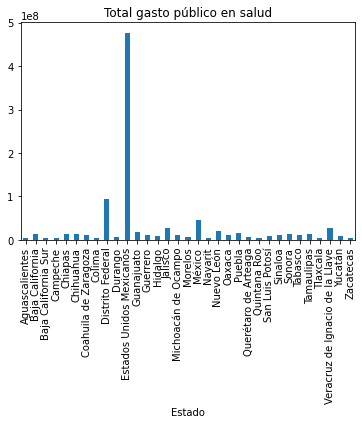

In [ ]:
#Visualización
gasto_salud_por_estado.plot(kind='bar', subplots=True)

#### **Dataset 2:** Mortalidad cáncer de mama, México
- **Observaciones:** Estados de la República
- **Periodo:** 2000-2015
- **Archivo:** "MortalidadCaMa2000a2015.csv"
- **Fuente:** Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA)
- **Descripción:** Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015

##### **I. Carga de datos**

In [ ]:
### SEGUNDO DATASET: 
## I.Cargar datos en formato csv
#NOTA: Archivo en  latin-1
mortalidad = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/SSA%20Mexico/MortalidadCaMa2000a2015.csv", sep=',', encoding='latin-1')
mortalidad.head()

,Entidad de Residencia,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
0,Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
1,Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
2,Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
3,Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
4,Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


##### **II. Limpieza de datos**

In [ ]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
mortalidad.shape

(33, 33)

In [ ]:
#Tipo de datos
mortalidad.dtypes
#Nota: Los datos son numéricos

Entidad de Residencia     object
num_2000                   int64
tasa_2000                float64
num_2001                   int64
tasa_2001                float64
num_2002                   int64
tasa_2002                float64
num_2003                   int64
tasa_2003                float64
num_2004                   int64
tasa_2004                float64
num_2005                   int64
tasa_2005                float64
num_2006                   int64
tasa_2006                float64
num_2007                   int64
tasa_2007                float64
num_2008                   int64
tasa_2008                float64
num_2009                   int64
tasa_2009                float64
num_2010                   int64
tasa_2010                float64
num_2011                   int64
tasa_2011                float64
num_2012                   int64
tasa_2012                float64
num_2013                   int64
tasa_2013                float64
num_2014                   int64
tasa_2014 

In [ ]:
#Información de DataFrame
mortalidad.info

<bound method DataFrame.info of    Entidad de Residencia  num_2000  tasa_2000  ...  tasa_2014  num_2015  tasa_2015
0               Nacional      3419       14.1  ...       17.6      6252       18.0
1         Aguascalientes        36       15.6  ...       19.2        71       20.2
2        Baja California        98       16.7  ...       19.9       213       22.0
3    Baja California Sur        20       19.1  ...       15.6        33       16.0
4               Campeche        10        6.3  ...        6.8        29       11.4
5   Coahuila de Zaragoza       114       19.7  ...       21.3       215       25.7
6                 Colima        17       12.8  ...       24.1        46       22.0
7                Chiapas        53        6.3  ...       12.2       142       10.8
8              Chihuahua       152       20.9  ...       29.9       261       24.8
9       Distrito Federal       575       22.2  ...       24.0       739       24.7
10               Durango        48       14.0  ...     

In [ ]:
#Contar los NaN por columna
mortalidad.isna().sum(axis=0)
#Nota: Este DataFrame no tiene datos nulos

Entidad de Residencia    0
num_2000                 0
tasa_2000                0
num_2001                 0
tasa_2001                0
num_2002                 0
tasa_2002                0
num_2003                 0
tasa_2003                0
num_2004                 0
tasa_2004                0
num_2005                 0
tasa_2005                0
num_2006                 0
tasa_2006                0
num_2007                 0
tasa_2007                0
num_2008                 0
tasa_2008                0
num_2009                 0
tasa_2009                0
num_2010                 0
tasa_2010                0
num_2011                 0
tasa_2011                0
num_2012                 0
tasa_2012                0
num_2013                 0
tasa_2013                0
num_2014                 0
tasa_2014                0
num_2015                 0
tasa_2015                0
dtype: int64

In [ ]:
#Cambiar nombre
mortalidad_rename = mortalidad.rename(columns={'Entidad de Residencia' : 'Estado'})
mortalidad_rename.head()

,Estado,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
0,Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
1,Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
2,Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
3,Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
4,Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


In [ ]:
#Cambiar índice a 'Entidad de Residencia'
mortalidad_rename = mortalidad_rename.set_index(['Estado'])

In [ ]:
#Revisar cambio
mortalidad_rename.head()

,num_2000,tasa_2000,num_2001,tasa_2001,num_2002,tasa_2002,num_2003,tasa_2003,num_2004,tasa_2004,num_2005,tasa_2005,num_2006,tasa_2006,num_2007,tasa_2007,num_2008,tasa_2008,num_2009,tasa_2009,num_2010,tasa_2010,num_2011,tasa_2011,num_2012,tasa_2012,num_2013,tasa_2013,num_2014,tasa_2014,num_2015,tasa_2015
Estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nacional,3419,14.1,3563,14.3,3822,14.9,3861,14.7,4150,15.4,4205,15.2,4440,15.7,4581,15.8,4802,16.2,4893,16.1,5034,16.2,5206,16.3,5583,17.1,5405,16.3,5974,17.6,6252,18.0
Aguascalientes,36,15.6,31,13.0,37,15.0,40,15.8,42,16.1,50,18.6,37,13.4,49,17.2,69,23.5,50,16.6,45,14.5,59,18.5,69,21.1,55,16.4,66,19.2,71,20.2
Baja California,98,16.7,102,16.6,103,16.1,105,15.7,120,17.3,126,17.5,129,17.3,148,19.2,153,19.2,161,19.6,163,19.3,166,19.1,180,20.1,178,19.4,188,19.9,213,22.0
Baja California Sur,20,19.1,19,17.3,20,17.4,27,22.4,23,18.2,25,18.9,32,23.1,34,23.4,34,22.3,33,20.7,31,18.6,39,22.3,36,19.7,34,17.9,31,15.6,33,16.0
Campeche,10,6.3,13,7.9,16,9.4,15,8.5,20,10.9,22,11.6,30,15.3,13,6.4,19,9.1,26,12.1,26,11.7,22,9.6,21,8.9,25,10.3,17,6.8,29,11.4


##### **III. Procesamiento y exploración**

In [ ]:
## III. Análisis exploratorio de datos
mortalidad_rename.sum(axis=1)

Estado
Nacional                75443.9
Aguascalientes           1080.7
Baja California          2628.0
Baja California Sur       783.9
Campeche                  480.2
Coahuila de Zaragoza     2721.3
Colima                    852.3
Chiapas                  1792.7
Chihuahua                3534.1
Distrito Federal        10478.6
Durango                  1238.9
Guanajuato               3476.4
Guerrero                 1556.8
Hidalgo                  1529.2
Jalisco                  6623.2
México                   9201.9
Michoacán de Ocampo      2891.9
Morelos                  1399.7
Nayarit                   901.0
Nuevo León               4636.0
Oaxaca                   1553.5
Puebla                   2982.1
Querétaro de Arteaga     1321.5
Quintana Roo              531.5
San Luis Potosí          1678.7
Sinaloa                  2329.2
Sonora                   2653.0
Tabasco                  1186.1
Tamaulipas               2990.0
Tlaxcala                  715.9
Veracruz Llave           4969.2
Y

In [ ]:
#Máximo
mortalidad_rename.max(axis=1)

Estado
Nacional                6252.0
Aguascalientes            71.0
Baja California          213.0
Baja California Sur       39.0
Campeche                  30.0
Coahuila de Zaragoza     215.0
Colima                    49.0
Chiapas                  157.0
Chihuahua                308.0
Distrito Federal         739.0
Durango                   92.0
Guanajuato               277.0
Guerrero                 118.0
Hidalgo                  119.0
Jalisco                  495.0
México                   743.0
Michoacán de Ocampo      215.0
Morelos                  105.0
Nayarit                   58.0
Nuevo León               386.0
Oaxaca                   125.0
Puebla                   227.0
Querétaro de Arteaga     106.0
Quintana Roo              59.0
San Luis Potosí          119.0
Sinaloa                  189.0
Sonora                   233.0
Tabasco                   98.0
Tamaulipas               214.0
Tlaxcala                  45.0
Veracruz Llave           383.0
Yucatán                   88.0
Z

In [ ]:
#Mínimo
mortalidad_rename.min(axis=1)

Estado
Nacional                14.1
Aguascalientes          13.0
Baja California         15.7
Baja California Sur     15.6
Campeche                 6.3
Coahuila de Zaragoza    16.9
Colima                  12.8
Chiapas                  6.2
Chihuahua               18.6
Distrito Federal        19.3
Durango                 11.9
Guanajuato              10.6
Guerrero                 8.1
Hidalgo                 10.2
Jalisco                 17.5
México                  11.8
Michoacán de Ocampo     11.9
Morelos                  9.8
Nayarit                 11.9
Nuevo León              17.1
Oaxaca                   7.2
Puebla                   9.6
Querétaro de Arteaga     9.9
Quintana Roo             3.9
San Luis Potosí          8.9
Sinaloa                 12.4
Sonora                  17.6
Tabasco                  7.9
Tamaulipas              16.2
Tlaxcala                 6.4
Veracruz Llave          11.7
Yucatán                  7.2
Zacatecas               10.7
dtype: float64

In [ ]:
#Estadística descriptiva
mortalidad_rename.describe().loc[["mean", "std"]].T

,mean,std
num_2000,207.212121,588.299178
tasa_2000,13.312121,4.775311
num_2001,215.939394,612.902569
tasa_2001,13.469697,3.974960
num_2002,231.636364,656.996900
tasa_2002,14.257576,4.582373
num_2003,234.000000,663.530472
tasa_2003,14.087879,4.371696
num_2004,251.515152,712.379951
tasa_2004,14.666667,4.147414


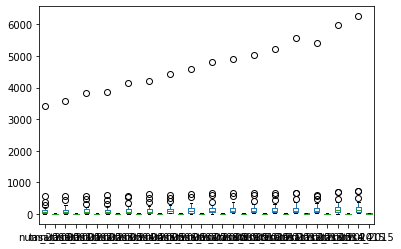

In [ ]:
#Visualización
mortalidad_rename.plot(kind='box', subplots=False)

### **Pregunta de investigación 3**
#### **3. ¿Qué países han logrado manejar el problema de manera adecuada?**

### **Pregunta de investigación 4**
#### **4. ¿Cuál es la relación entre los gastos de salud y los resultados en su política en la lucha contra el cáncer?**

En esta sección revisaremos el gasto en salud de los países miembros de la Organización para la Cooperación y el Desarrollo Económico (OCDE), del cual forma parte México. Asimismo, revisaremos indicadores sobre la incidencia del cáncer de mama en dichos países, con el fin de relacionar el gasto devengado en materia sanitaria con las estrategias para combatir el cáncer y sus resultados.

####**Dataset 1:** Global Health Expenditure Database (GHED), OMS

- **Observaciones:** 37 países miembros
- **Periodo:** 2000-2018
- **Archivo:** "WHO_NHA_indicators.csv"
- **Fuente:** Data Explorer, Organización Mundial de la Salud (OMS).
- **Descripción:** Gasto en Salud expresado como porcentaje del PIB a precios constantes. PPP indica precio paridad de producto, es decir, está normalizado par su comparación entre países con diferentes tipos de cambio y niveles de inflación. 


##### **I. Carga de datos**

In [14]:
#Librerías
import pandas as pd
import numpy as np

### PRIMER DATASET: OMS (2021). "Global Health Expenditure Database (GHED)"
## I.Cargar datos en formato csv
gasto_ocde = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/OCDE/WHO_NHA_indicators.csv", sep=',')
gasto_ocde.head()

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,Current Health Expenditure (CHE) as % Gross Do...,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
1,Canada,Current Health Expenditure (CHE) per Capita in...,2430,2618,2758,2928,3087,3290,3555,3718,3855,4140,4257,4273,4384,4553,4660,4729,4909,5023,5200
2,Canada,Domestic General Government Health Expenditure...,73,73,72,73,73,73,73,73,73,73,73,74,74,74,74,74,73,73,73
3,Canada,Domestic Private Health Expenditure (PVT-D) as...,27,27,28,27,27,27,27,27,27,27,27,26,26,26,26,26,27,27,27
4,Chile,Current Health Expenditure (CHE) as % Gross Do...,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9


##### **II. Limpieza de datos**

In [15]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
gasto_ocde.shape

(148, 21)

In [16]:
#Tipo de datos
gasto_ocde.dtypes

Country      object
Indicator    object
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
dtype: object

In [17]:
#Contar NaN
gasto_ocde.isna()

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#Sumar NaN por columna
gasto_ocde.isna().sum(axis=0)
#Nota: No hay NaN en este DataFrame

Country      0
Indicator    0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
dtype: int64

In [26]:
#Mostrar lista de países (únicos)
gasto_ocde['Country'].unique()

array(['Canada', 'Chile', 'Colombia', 'Mexico',
       'United States of America', 'Austria', 'Belgium', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'United Kingdom', 'Australia', 'Japan',
       'New Zealand', 'Republic of Korea'], dtype=object)

In [ ]:
#Ocurrencia por país
gasto_ocde['Country'].value_counts()

In [ ]:
#Mostrar indicadores (únicos)
gasto_ocde['Indicator'].unique()

In [22]:
#Remplazar nombre de indicadores para que sean más entendibles y cortos
gasto_ocde['Indicator'].replace(
    to_replace=['Current Health Expenditure (CHE) as % Gross Domestic Product (GDP)',
    'Current Health Expenditure (CHE) per Capita in PPP',
    'Domestic General Government Health Expenditure (GGHE-D) as % Current Health Expenditure (CHE)',
    'Domestic Private Health Expenditure (PVT-D) as % Current Health Expenditure (CHE)'],
    value=['Gasto en Salud % PIB',
    'Gasto en Salud PPP per cápita',
    'Gasto Público % Gasto en Salud',
    'Gasto Privado % Gasto en Salud'],
    inplace=True
)

In [23]:
#Corroborar cambios
gasto_ocde.head()

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,Gasto en Salud % PIB,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
1,Canada,Gasto en Salud PPP per cápita,2430,2618,2758,2928,3087,3290,3555,3718,3855,4140,4257,4273,4384,4553,4660,4729,4909,5023,5200
2,Canada,Gasto Público % Gasto en Salud,73,73,72,73,73,73,73,73,73,73,73,74,74,74,74,74,73,73,73
3,Canada,Gasto Privado % Gasto en Salud,27,27,28,27,27,27,27,27,27,27,27,26,26,26,26,26,27,27,27
4,Chile,Gasto en Salud % PIB,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9


##### **III. Procesamiento y exploración**

In [24]:
## III. Análisis exploratorio de datos
import statistics
gasto_ocde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    148 non-null    object
 1   Indicator  148 non-null    object
 2   2000       148 non-null    int64 
 3   2001       148 non-null    int64 
 4   2002       148 non-null    int64 
 5   2003       148 non-null    int64 
 6   2004       148 non-null    int64 
 7   2005       148 non-null    int64 
 8   2006       148 non-null    int64 
 9   2007       148 non-null    int64 
 10  2008       148 non-null    int64 
 11  2009       148 non-null    int64 
 12  2010       148 non-null    int64 
 13  2011       148 non-null    int64 
 14  2012       148 non-null    int64 
 15  2013       148 non-null    int64 
 16  2014       148 non-null    int64 
 17  2015       148 non-null    int64 
 18  2016       148 non-null    int64 
 19  2017       148 non-null    int64 
 20  2018       148 non-null    int64

In [32]:
#Estadística descriptiva
gasto_ocde.describe().loc[["mean", "std"]].T

,mean,std
2000,461.263514,891.546790
2001,494.364865,956.921859
2002,531.891892,1036.076621
2003,560.141892,1091.108848
2004,594.587838,1161.460943
2005,623.256757,1215.876678
2006,667.804054,1299.940217
2007,704.500000,1367.095663
2008,755.270270,1460.888256
2009,791.432432,1533.258440


In [77]:
#Filtrar sólo indicador 'Gasto en Salud % PIB'
ocde_pib = gasto_ocde['Indicator'] == 'Gasto en Salud % PIB'
ocde_pib.head()

0     True
1    False
2    False
3    False
4     True
Name: Indicator, dtype: bool

In [78]:
#Aplicar selección
gasto_ocde_pib = gasto_ocde[ocde_pib]
gasto_ocde_pib.head()

,Country,Indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,Gasto en Salud % PIB,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
4,Chile,Gasto en Salud % PIB,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9
8,Colombia,Gasto en Salud % PIB,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8
12,Mexico,Gasto en Salud % PIB,4,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5
16,United States of America,Gasto en Salud % PIB,13,13,14,15,15,15,15,15,15,16,16,16,16,16,16,17,17,17,17


In [79]:
#Eliminar columna indicador, ya no es relevante
del gasto_ocde_pib['Indicator']
gasto_ocde_pib.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
4,Chile,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9
8,Colombia,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8
12,Mexico,4,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5
16,United States of America,13,13,14,15,15,15,15,15,15,16,16,16,16,16,16,17,17,17,17


In [80]:
#Cambiar índice
gasto_ocde_pib.set_index('Country')

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,,,,,,,,,
Canada,8,9,9,9,9,9,9,9,10,11,11,10,10,10,10,11,11,11,11
Chile,7,7,7,7,7,7,6,6,7,7,7,7,7,7,8,8,9,9,9
Colombia,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8
Mexico,4,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5
United States of America,13,13,14,15,15,15,15,15,15,16,16,16,16,16,16,17,17,17,17
Austria,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Belgium,8,8,8,9,9,9,9,9,10,10,10,10,11,11,10,10,10,10,10
Czech Republic,6,6,6,7,6,6,6,6,6,7,7,7,7,8,8,7,7,7,8
Denmark,8,8,9,9,9,9,9,9,10,11,10,10,10,10,10,10,10,10,10


In [81]:
#Trasponer DataFrame para convertir años en índices y tratar como time series
gasto_ocde_pib_t = gasto_ocde_pib.transpose()
gasto_ocde_pib_t.head()

,0,4,8,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80,84,88,92,96,100,104,108,112,116,120,124,128,132,136,140,144
Country,Canada,Chile,Colombia,Mexico,United States of America,Austria,Belgium,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,Australia,Japan,New Zealand,Republic of Korea
2000,8,7,6,4,13,9,8,6,8,5,7,10,10,7,7,9,6,7,8,5,6,6,8,8,5,8,5,8,7,7,9,5,7,8,7,7,4
2001,9,7,6,5,13,9,8,6,8,5,7,10,10,8,7,9,6,7,8,6,6,6,8,8,6,8,5,8,7,8,10,5,8,8,7,8,4
2002,9,7,6,5,14,9,8,6,9,5,8,10,10,8,7,9,7,7,8,6,6,7,9,9,6,9,6,8,7,8,10,5,8,8,7,8,4
2003,9,7,6,6,15,10,9,7,9,5,8,10,10,8,8,10,7,7,8,5,6,7,9,9,6,9,5,8,8,8,10,5,8,8,8,8,4


In [82]:
#Cambiar encabezado de columnas a Country
new_header = gasto_ocde_pib_t.loc['Country',]
gasto_ocde_pib_t = gasto_ocde_pib_t [1:]
gasto_ocde_pib_t.columns = new_header

In [86]:
#Corroborar cambios
gasto_ocde_pib_t.head()

Country,Canada,Chile,Colombia,Mexico,United States of America,Austria,Belgium,Czech Republic,Denmark,Estonia,Finland,France,Germany,Greece,Hungary,Iceland,Ireland,Israel,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,Australia,Japan,New Zealand,Republic of Korea
2000,8,7,6,4,13,9,8,6,8,5,7,10,10,7,7,9,6,7,8,5,6,6,8,8,5,8,5,8,7,7,9,5,7,8,7,7,4
2001,9,7,6,5,13,9,8,6,8,5,7,10,10,8,7,9,6,7,8,6,6,6,8,8,6,8,5,8,7,8,10,5,8,8,7,8,4
2002,9,7,6,5,14,9,8,6,9,5,8,10,10,8,7,9,7,7,8,6,6,7,9,9,6,9,6,8,7,8,10,5,8,8,7,8,4
2003,9,7,6,6,15,10,9,7,9,5,8,10,10,8,8,10,7,7,8,5,6,7,9,9,6,9,5,8,8,8,10,5,8,8,8,8,4
2004,9,7,6,6,15,10,9,6,9,5,8,10,10,8,8,9,7,7,8,6,6,7,9,9,6,9,6,8,8,8,10,5,8,8,8,8,4


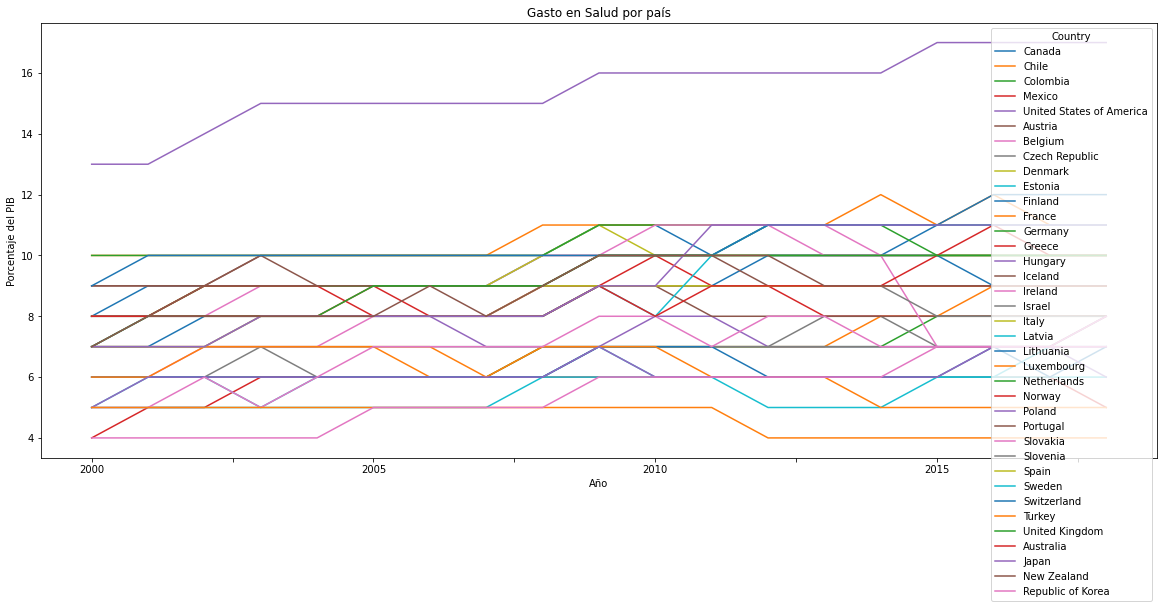

In [100]:
#Visualización
import matplotlib.pyplot as plt

gasto_ocde_pib_t.plot(kind='line', subplots=False, figsize=(20,8), title='Gasto en Salud por país', xlabel='Año', ylabel='Porcentaje del PIB')

####**Dataset 2:** Health Status: Cancer, OCDE

- **Observaciones:** 37 países miembros
- **Periodo:** 2000-2012
- **Archivo:** "HEALTH_STAT_24022021235442318.csv"
- **Fuente:** OECD Statistics technology, Organización para la Cooperación y el Desarrollo Económico (OCDE).
- **Descripción:** Variable de interés, CANCBREC | Malignant neoplasms of female breast.


##### **I. Carga de datos**

In [101]:
### SEGUNDO DATASET: OCDE (2020). “Health Status: Cancer”
## I.Cargar datos en formato csv
cancer_ocde = pd.read_csv("https://raw.githubusercontent.com/Zoe-Garcia/Equipo_2_P2/main/DATA/OCDE/HEALTH_STAT_24022021235442318.csv", sep=',')
cancer_ocde.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,312.0,NaN,NaN
1,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,314.1,NaN,NaN
2,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2012,2012,323.0,NaN,NaN
3,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,41.7,NaN,NaN
4,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,38.7,NaN,NaN


##### **II. Limpieza de datos**

In [102]:
##. II.Conocer DDBB y limpiarla
#Conocer tipo de datos y características generales del DataFrame
cancer_ocde.shape

(2976, 11)

In [103]:
#Tipo de datos
cancer_ocde.dtypes

VAR            object
Variable       object
UNIT           object
Measure        object
COU            object
Country        object
YEA             int64
Year            int64
Value         float64
Flag Codes    float64
Flags         float64
dtype: object

In [104]:
#Contar NaN
cancer_ocde.isna()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2971,False,False,False,False,False,False,False,False,False,True,True
2972,False,False,False,False,False,False,False,False,False,True,True
2973,False,False,False,False,False,False,False,False,False,True,True
2974,False,False,False,False,False,False,False,False,False,True,True


In [106]:
#Sumar NaN por columna
cancer_ocde.isna().sum(axis=0)

VAR              0
Variable         0
UNIT             0
Measure          0
COU              0
Country          0
YEA              0
Year             0
Value            0
Flag Codes    2976
Flags         2976
dtype: int64

In [114]:
#Eliminar columnas con todos los valores NaN
cancer_ocde.dropna(axis=1, how='all')
#Nota: Este proceso elimina las columnas sin datos 'Flags Codes' y 'Flags'

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value
0,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,312.0
1,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,314.1
2,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2012,2012,323.0
3,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,41.7
4,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,38.7
...,...,...,...,...,...,...,...,...,...
2971,CANCCOLC,Malignant neoplasms of colon,NBPOPIPC,Number of total cases,COL,Colombia,2012,2012,5663.0
2972,CANCLUNC,Malignant neoplasms of lung,PERCMTTX,Incidence per 100 000 population,LTU,Lithuania,2012,2012,26.2
2973,CANCCOLC,Malignant neoplasms of colon,INCITFTF,Incidence per 100 000 females,LTU,Lithuania,2012,2012,18.9
2974,CANCCEIX,Malignant neoplasms of cervix,NBWOMAPF,Number of female cases,LTU,Lithuania,2012,2012,615.0


In [115]:
#Guardar cambios de eliminación de columnas NaN en Data Frame
cancer_ocde_drop = cancer_ocde.dropna(axis=1, how='all')
cancer_ocde_drop.head()

,VAR,Variable,UNIT,Measure,COU,Country,YEA,Year,Value
0,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,312.0
1,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,314.1
2,CANCTOCA,Malignant neoplasms,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2012,2012,323.0
3,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2002,2002,41.7
4,CANCCOLC,Malignant neoplasms of colon,PERCMTTX,Incidence per 100 000 population,AUS,Australia,2008,2008,38.7


In [116]:
cancer_ocde_drop.columns

Index(['VAR', 'Variable', 'UNIT', 'Measure', 'COU', 'Country', 'YEA', 'Year',
       'Value'],
      dtype='object')

In [117]:
#Eliminar columnas que repiten información o no son relevantes: 'UNIT', 'COU','YEA'
cancer_ocde_drop = cancer_ocde_drop.drop(['UNIT', 'Measure','COU','YEA'], axis=1)
cancer_ocde_drop.head()

,VAR,Variable,Country,Year,Value
0,CANCTOCA,Malignant neoplasms,Australia,2002,312.0
1,CANCTOCA,Malignant neoplasms,Australia,2008,314.1
2,CANCTOCA,Malignant neoplasms,Australia,2012,323.0
3,CANCCOLC,Malignant neoplasms of colon,Australia,2002,41.7
4,CANCCOLC,Malignant neoplasms of colon,Australia,2008,38.7


In [118]:
#Tipo de dato
cancer_ocde_drop.dtypes

VAR          object
Variable     object
Country      object
Year          int64
Value       float64
dtype: object

In [119]:
#Convertir 'Year' en datetime
cancer_ocde_drop['Year'] = pd.to_datetime(cancer_ocde_drop['Year'].astype(str), format='%Y')

In [120]:
#Tipo de dato
cancer_ocde_drop.dtypes

VAR                 object
Variable            object
Country             object
Year        datetime64[ns]
Value              float64
dtype: object

##### **III. Procesamiento y exploración**

In [121]:
import statistics
cancer_ocde_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   VAR       2976 non-null   object        
 1   Variable  2976 non-null   object        
 2   Country   2976 non-null   object        
 3   Year      2976 non-null   datetime64[ns]
 4   Value     2976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 116.4+ KB


In [122]:
#Estadística descriptiva
cancer_ocde_drop.describe().loc[["mean", "std"]].T

,mean,std
Value,20875.413508,104634.591714


In [126]:
#Valores únicos de variable para encontrar cáncer de mama
cancer_ocde_drop['Variable'].unique()
#Nota: El resultado que nos interesa es sólo: 'Malignant neoplasms of female breast'

array(['Malignant neoplasms', 'Malignant neoplasms of colon',
       'Malignant neoplasms of lung',
       'Malignant neoplasms of female breast',
       'Malignant neoplasms of cervix', 'Malignant neoplasms of prostate'],
      dtype=object)

In [127]:
#Subconjunto sólo con información de cáncer de mama
cancer_mama = cancer_ocde_drop['Variable'] == 'Malignant neoplasms of female breast'
cancer_mama

0       False
1       False
2       False
3       False
4       False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
Name: Variable, Length: 2976, dtype: bool

In [136]:
#Aplicar selección
cancer_mama_ocde = cancer_ocde_drop[cancer_mama]
cancer_mama_ocde.head()

,VAR,Variable,Country,Year,Value
369,CANCBREC,Malignant neoplasms of female breast,Australia,2002-01-01,83.2
370,CANCBREC,Malignant neoplasms of female breast,Australia,2008-01-01,84.8
371,CANCBREC,Malignant neoplasms of female breast,Australia,2012-01-01,86.0
387,CANCBREC,Malignant neoplasms of female breast,Austria,2000-01-01,67.2
388,CANCBREC,Malignant neoplasms of female breast,Austria,2002-01-01,70.5


In [137]:
#Eliminar columnas irrelevantes de subconjunto
cancer_mama_ocde_drop = cancer_mama_ocde.drop(['VAR', 'Variable'], axis=1)
cancer_mama_ocde_drop.head()

,Country,Year,Value
369,Australia,2002-01-01,83.2
370,Australia,2008-01-01,84.8
371,Australia,2012-01-01,86.0
387,Austria,2000-01-01,67.2
388,Austria,2002-01-01,70.5


In [138]:
#Tipo de datos
cancer_mama_ocde_drop.dtypes

Country            object
Year       datetime64[ns]
Value             float64
dtype: object

In [139]:
#Cambiar índice a Year
cancer_mama_ocde_drop = cancer_mama_ocde_drop.set_index('Year')
cancer_mama_ocde_drop.head()

,Country,Value
Year,,
2002-01-01,Australia,83.2
2008-01-01,Australia,84.8
2012-01-01,Australia,86.0
2000-01-01,Austria,67.2
2002-01-01,Austria,70.5


In [171]:
#Visualización
import altair as alt
alt.Chart(cancer_mama_ocde_drop).mark_line().encode(
  x='Year:T',
  y='Value:Q',
  color='Country:N'
).interactive(bind_y=False)

#import matplotlib.pyplot as plt
#cancer_mama_ocde_drop.plot(kind='pie')
#cancer_mama_ocde_drop.plot(kind='line', use_index=True, subplots=True, figsize=(10,5), title='Incidencia cáncer de mama por cada 100mil mujeres', xlabel='Año', ylabel='Valor')

alt.Chart(...)

###**Fuentes de bases de datos:**
#####**Pregunta 2**
DGIS (9 de mayo de 2019). “Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)”, Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: http://www.dgis.salud.gob.mx/descargas/xls/1._GFF_01_2017_A_CONS_O.xlsx

DGIS (2 de diciembre de 2016). "Defunciones de mujeres de 25 años y más por tumor maligno de mama (C50), 2000-2015", Dirección General de Información en Salud (DGIS) Secretaría de Salud (SSA), México. Recuperado de: https://www.gob.mx/cms/uploads/attachment/file/269549/MortalidadCaMa2000a2015.pdf

#####**Pregunta 4**
OCDE (1 de julio de 2020). “Health Status: Cancer”, OECD Statistics technology, Organización para la Cooperación y el Desarrollo Económico (OCDE). Recuperado de: https://stats.oecd.org/index.aspx?queryid=30121#

OMS (2 de marzo de 2021). “Global Health Expenditure Database (GHED)”, Data Explorer, Organización Mundial de la Salud (OMS). Recuperado de: https://apps.who.int/nha/database/Select/Indicators/en